In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def rk4(f, y0, t0, tf, h):
    """
    Solves a first-order ordinary differential equation or a system of them
    using the 4th-order Runge-Kutta (RK4) method.

    The ODE is expected to be in the form dy/dt = f(t, y).

    Args:
        f (callable): The function defining the ODE system, f(t, y).
                      It must return an array-like object of the same shape as y.
        y0 (float or array-like): The initial condition(s) for y at time t0.
        t0 (float): The starting time.
        tf (float): The ending time.
        h (float): The step size for the integration.

    Returns:
        tuple: A tuple containing:
            - t_points (numpy.ndarray): Array of time points.
            - y_points (numpy.ndarray): Array of solution values for y at each time point.
                                        If y is a vector, this will be a 2D array
                                        where each row corresponds to a time point.
    """
    # Generate time points
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    # Ensure y0 is a numpy array for consistent operations
    y0 = np.atleast_1d(y0)

    # Initialize array to store the solution
    y_points = np.zeros((n_steps, len(y0)))
    y_points[0] = y0

    # RK4 integration loop
    y = y0
    for i in range(n_steps - 1):
        t = t_points[i]

        k1 = h * f(t, y)
        k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(t + h, y + k3)

        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y_points[i+1] = y

    return t_points, y_points



### Example: Solve y′ = −2y, y(0) = 1, using RK4 with step size h = 0.1 upto x = 1 and plot y vs x.
True Soln: $e^{−2x}$

In [21]:
def f(t,x):
    return -2*x

In [26]:
# rk4
t_points, y_points = rk4(f, 1, 0, 1, 0.1)
# True values
y = np.exp(-2*t_points)


Text(0.5, 1.0, 'y vs x using RK4')

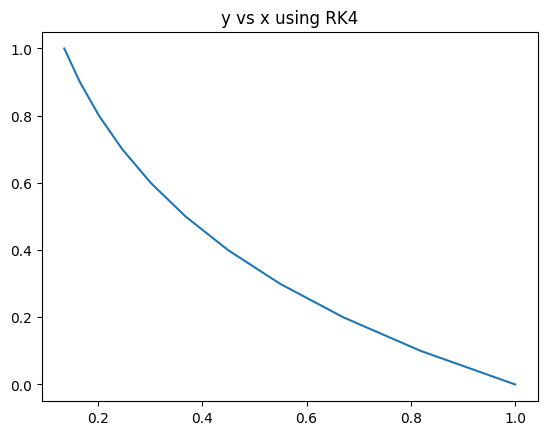

In [29]:
plt.plot(y_points, t_points)
plt.title("y vs x using RK4")

Text(0.5, 1.0, 'y vs x (putting y = e^(-2x))')

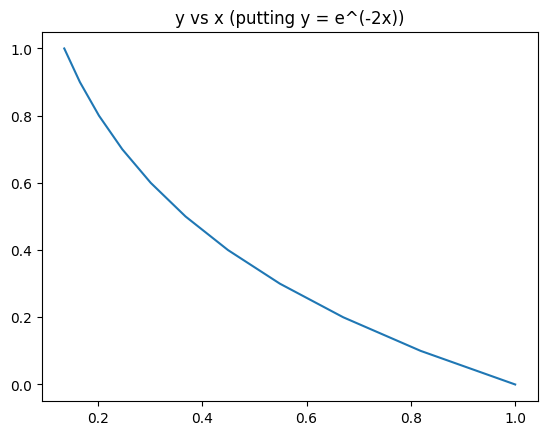

In [30]:
plt.plot(y, t_points)
plt.title("y vs x (putting y = e^(-2x))")

----

In [ ]:
def rk4_coupled_oscillator(f, y1_0, y2_0, t0, tf, h):
    """
    Solves a specific system of two coupled first-order ODEs using RK4.
    The system is expected to be in the form:
    y1' = y2
    y2' = f(t, y1, y2)

    This is a specialized version of the general rk4 solver for this common
    structure, often arising from second-order ODEs.

    Args:
        f (callable): The function defining the second derivative, f(t, y1, y2).
        y1_0 (float): The initial condition for y1 at time t0.
        y2_0 (float): The initial condition for y2 at time t0.
        t0 (float): The starting time.
        tf (float): The ending time.
        h (float): The step size for the integration.

    Returns:
        tuple: A tuple containing:
            - t_points (numpy.ndarray): Array of time points.
            - y_points (numpy.ndarray): 2D array of solution values. Column 0 is y1,
                                        column 1 is y2.
    """
    
    t_points = np.arange(t0, tf + h, h)
    n_steps = len(t_points)

    y_points = np.zeros((n_steps, 2))
    y_points[0] = [y1_0, y2_0]

    y1, y2 = y1_0, y2_0

    for i in range(n_steps - 1):
        t = t_points[i]

        # Calculate k and l coefficients for y1 and y2 respectively
        k1 = h * y2
        l1 = h * f(t, y1, y2)

        k2 = h * (y2 + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y1 + 0.5 * k1, y2 + 0.5 * l1)

        k3 = h * (y2 + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y1 + 0.5 * k2, y2 + 0.5 * l2)

        k4 = h * (y2 + l3)
        l4 = h * f(t + h, y1 + k3, y2 + l3)

        # Update y1 and y2
        y1 = y1 + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        y2 = y2 + (l1 + 2*l2 + 2*l3 + l4) / 6.0

        y_points[i+1] = [y1, y2]

    return t_points, y_points

### Activity : Damped and Driven Oscillator

#### Case - 1